In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
iris.keys()
print(type(iris))

<class 'sklearn.utils.Bunch'>


In [19]:
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("데이터 프레임의 형태:", df.shape)
df

데이터 프레임의 형태: (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


concat() 메서드는 데이터프레임 뿐만 아니라 시리즈도 연결할 수 있다. 그 대신 시리즈 객체를 데이터프레임으로 변경하고, 전치시켜주는 과정을 거쳐야한다.

In [24]:
df1 = df['Target'] = iris['target'] # 타겟은 왜했느냐 class를 확인하기 위해
print("데이터셋 크기 :", df.shape)
df = pd.concat([df, df1.to_frame().T], ignore_index=True)
df

데이터셋 크기 : (150, 5)


AttributeError: 'numpy.ndarray' object has no attribute 'to_frame'

In [5]:
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'target']
df.head(2)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   target        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [15]:
from sklearn.preprocessing import StandardScaler #표준화 패키지 라이브러리
x = df.drop(['target'], axis=1).values # 독립변인들의 value값만 추출
y = df['target'].value # 종속변인 추출

x = StandardScaler().fit_transform(x) # x객체에 x를 표준화한 데이터를 저장

features = ['sepal length', 'sepal width', 'petal length', 'petal width']
pd.DataFrame(x, columns=features).head()

AttributeError: 'Series' object has no attribute 'value'

In [14]:
# PCA 실행
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 주성분을 몇개로 할 지 결정
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns= ['principal component1', 'principal component2'])
# 주성분으로 이루어진 데이터 프레임 구성

,principal component1,principal component2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [8]:
principalDf.head()

,principal component1,principal component2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [9]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [10]:
sum(pca.explained_variance_ratio_)

0.9581320720000164

sklearn에서 언더바(_)는 분석이 진행된 이후의 결과 값을 나타낸다. 

​pca에서 위와 같은 코드로 간단하게 내가 설정한 주성분의 개수(n_components)로 전체 데이터의 분산을 얼마만큼 설명 가능한지 알 수 있다. 

본 데이터의 경우 두 개의 주성분이 전체 분산의 약 96%를 설명한다.

In [11]:
pca = PCA(n_components=3)

printcipalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2', '3'])

pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

n_components=3 으로 분석을 진행하면

분석 결과, 3번째 주성분의 분산 설명량은 0.03밖에 되지 않는다.

따라서, 추가적인 주성분을 투입하더라도 설명 가능한 분산량이 얼마 증가하지 않기 때문에 주성분은 두 개로 결정하는 것이 적절하다고 할 수 있다.

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32


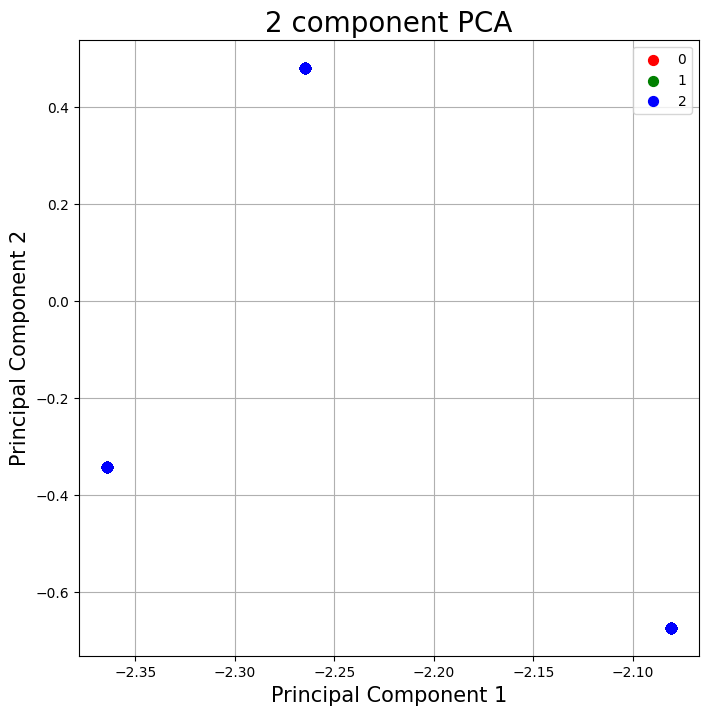

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize=20)

targets = ['0', '1', '2']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df['target']
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component1']
               , principalDf.loc[indicesToKeep, 'principal component2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()